# EX1: Implement GMM algorithm by Numpy.

In [2]:
import numpy as np

def PDF(data, means, variances):
    return 1/(np.sqrt(2 * np.pi * variances) + eps) * np.exp(-1/2 * (np.square(data - means) / (variances + eps)))

def EM_GMM(data, k, iterations):
    weights = np.ones((k, 1)) / k # shape=(k, 1)
    means = np.random.choice(data, k)[:, np.newaxis] # shape=(k, 1)
    variances = np.random.random_sample(size=k)[:, np.newaxis] # shape=(k, 1)

    data = np.repeat(data[np.newaxis, :], k, 0) # shape=(k, n)

    for step in range(iterations):
        # Expectation step
        likelihood = PDF(data, means, np.sqrt(variances)) # shape=(k, n)

        # Maximization step
        b = likelihood * weights # shape=(k, n)
        b /= np.sum(b, axis=1)[:, np.newaxis] + eps

        # updage means, variances, and weights
        means = np.sum(b * data, axis=1)[:, np.newaxis] / (np.sum(b, axis=1)[:, np.newaxis] + eps)
        variances = np.sum(b * np.square(data - means), axis=1)[:, np.newaxis] / (np.sum(b, axis=1)[:, np.newaxis] + eps)
        weights = np.mean(b, axis=1)[:, np.newaxis]
        
    return means, variances

# EX2: Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply GMM algorithm built in the first question or used sklearn library? Try different number of cluster to see how the result change? Draw the elbow and Silhouette score for the above dataset

# EX3:  Compare kmeans and GMM (cons and pros)# 

PROS:
- KMeans and GMM are both clustering models. 

CONS:
- KMeans groups data points using distance form the cluster centroid, GMM uses probabilistic assignment of data points to clusters. 

- KMeans is prototype - based clustering while GMM generates density - based cluters. 

- The performance of GMM is better than that of KMeans. 

- K-Means requires much less time to discover and group the workloads into required number of clusters than required by GMM for corresponding number of Gaussian components. 



# EX4:  Find 3 examples that GMM is better than kmeans

The Iris flower data set (150×4) is a multivariate data set. consists of three species of Iris (Iris setosa,
Iris virginica and Iris versicolor) and each of them has 50 samples. 

We applied K-means to Iris data set, it showed the error rate is 0.1067 which was not good enough.
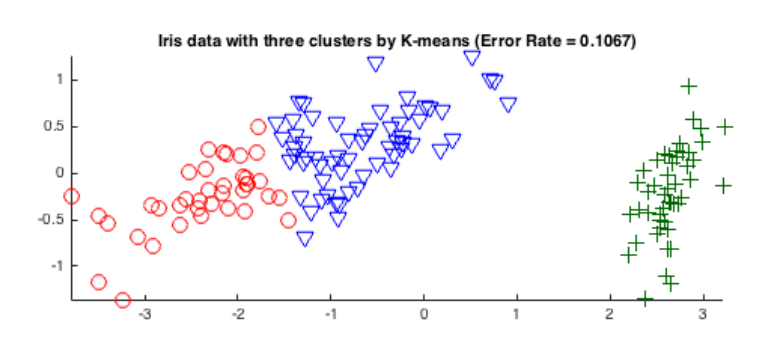

Now, we apply GMM algorithm, error rate of GMM is 0.0333
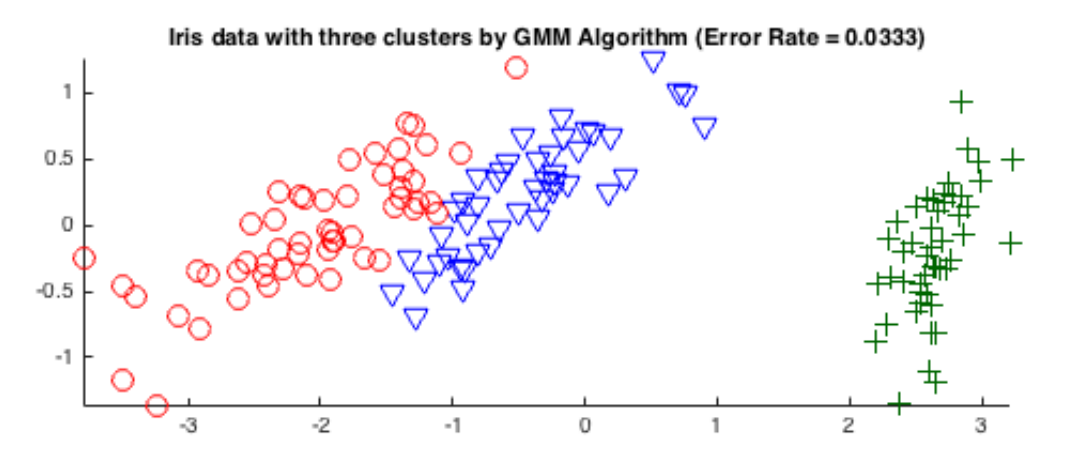


For toy dataset, 

KMeans 
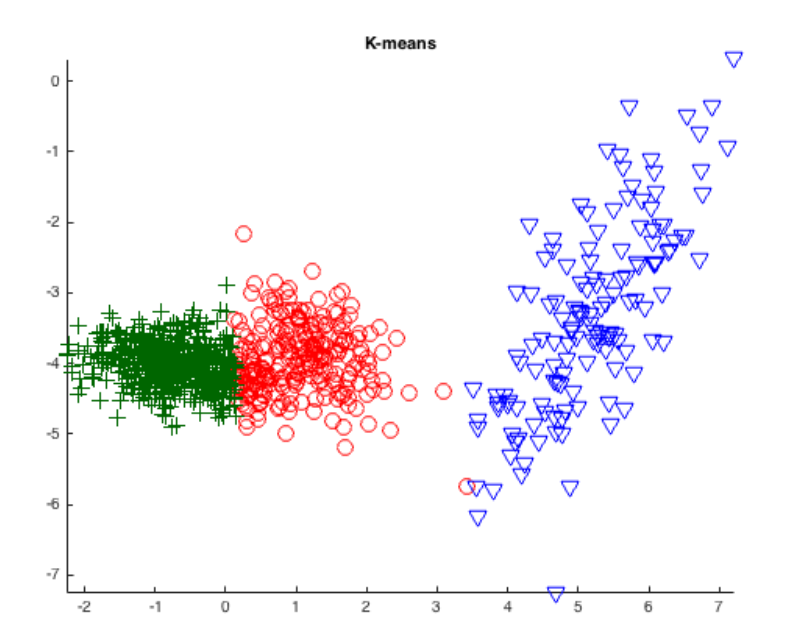

GMM 
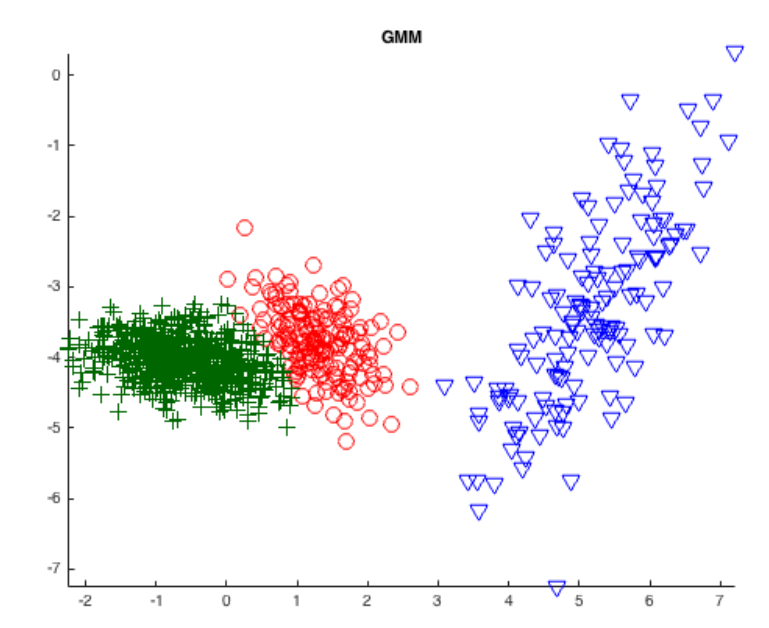